## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [2]:
# Use the processed file of wiki in part 1
path = r"C:\Users\Haobo\Desktop\Artificial-Intelligence-NLP"

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
sentences = LineSentence(path+"\wiki_clean_result.txt")
model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save("word2vec_wiki.model")



## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [10]:
model.wv.distance('美丽', '打人')

0.9358598217368126

In [9]:
model.wv.distance('宝马', '抖音')

0.6717473864555359

In [8]:
model.wv.distance('玫瑰', '花')

0.5296947360038757

In [7]:
model.wv.distance('车辆', '猫咪')

0.8463563919067383

In [12]:
model.wv.distance('风', '雨')

0.4646366834640503

In [13]:
model.wv.distance('吃', '玩')

0.3288472890853882

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [1]:
from sklearn.manifold import TSNE
import numba
import matplotlib
import matplotlib.pyplot as plt

@numba.jit
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 712 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 601 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Gly

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51060 missing from current font.
  font.load_char(ord(s), flags=flags)


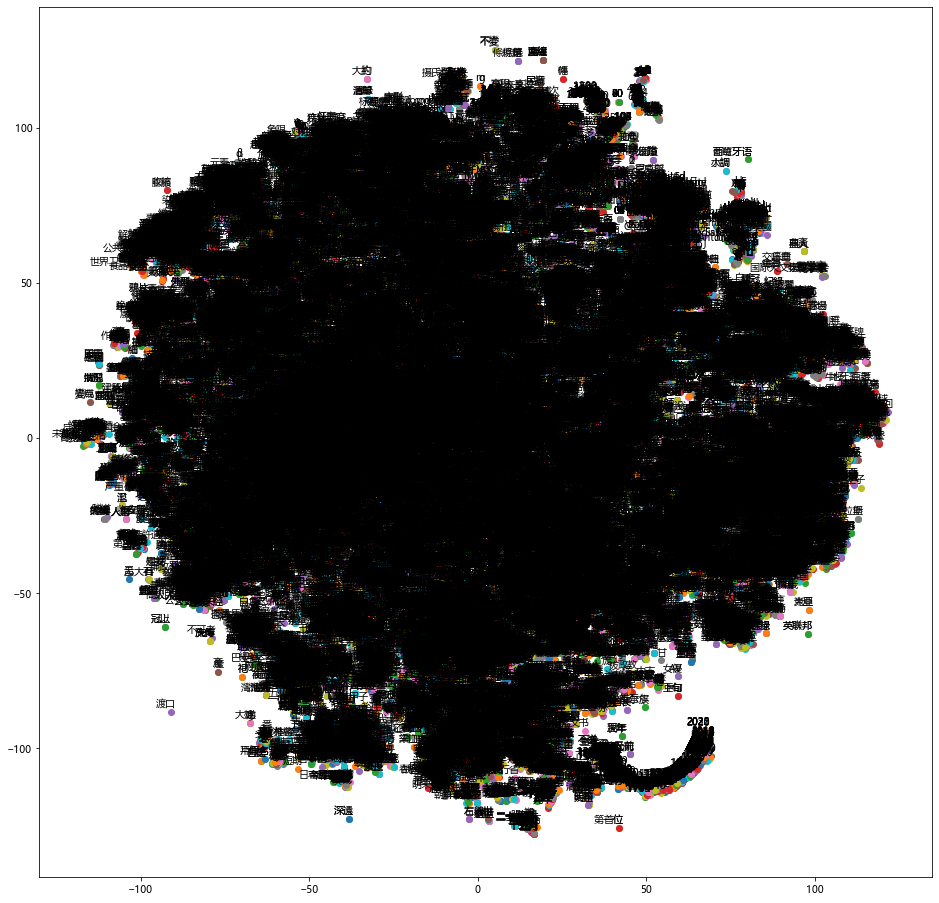

Wall time: 1h 48min 8s


In [2]:
%%time
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

path = r"C:\Users\Haobo\Desktop\Artificial-Intelligence-NLP"
sentences = LineSentence(path+"\wiki_clean_result.txt")
model2 = Word2Vec(sentences, size=100, window=20, min_count=500, workers=4)
tsne_plot(model2)

In [5]:
model2.most_similar('美丽')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('可爱', 0.7946971654891968),
 ('优雅', 0.7699949145317078),
 ('优美', 0.7512601613998413),
 ('欢乐', 0.7170789241790771),
 ('赞美', 0.693423330783844),
 ('爱', 0.6856472492218018),
 ('华丽', 0.6763738393783569),
 ('漂亮', 0.6627962589263916),
 ('孤独', 0.6578075289726257),
 ('爱情', 0.6564090251922607)]

In [6]:
model2.most_similar('学生')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('教师', 0.7891830205917358),
 ('大学生', 0.7770803570747375),
 ('毕业生', 0.7758045196533203),
 ('师生', 0.7719491720199585),
 ('学校', 0.7511627674102783),
 ('班级', 0.7463549971580505),
 ('同学', 0.7237595915794373),
 ('入学', 0.707936704158783),
 ('该校', 0.706542432308197),
 ('学员', 0.6956687569618225)]

In [10]:
model2.most_similar('西游记')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('红楼梦', 0.7691086530685425),
 ('三国演义', 0.7392276525497437),
 ('民间传说', 0.6702250242233276),
 ('传', 0.6671707034111023),
 ('神仙', 0.6590504050254822),
 ('戏', 0.6487530469894409),
 ('传奇', 0.6405426859855652),
 ('龙王', 0.6243470907211304),
 ('金庸', 0.6242953538894653),
 ('八部', 0.621999204158783)]